In [1]:
import numpy as np
import operator
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split('\t')) - 1 #get number of fields 
    dataMat = []; 
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [3]:
xArr,yArr = loadDataSet("ex0.txt")

In [4]:
def plot_line(xArr, yArr, w):
    x = np.array(xArr)
    plt.scatter(x[:,1], yArr,marker='x',color = 'r')
    if any(w) :
        plt.plot(x[:,1],x.dot(w),color = "blue",linestyle = "-")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Line regression')
    plt.show()

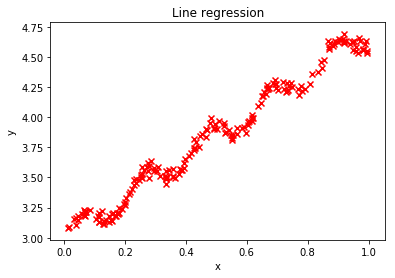

In [5]:
plot_line(xArr,yArr, {})

In [6]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); 
    yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    # det 求矩阵的行列式，如果行列式为0 矩阵就不可逆
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = np.linalg.solve(xTx, xMat.T*yMat)
    #ws = xTx.I * (xMat.T*yMat)
    return ws

In [7]:
w = standRegres(xArr,yArr)

In [8]:
w.A

array([[3.00774324],
       [1.69532264]])

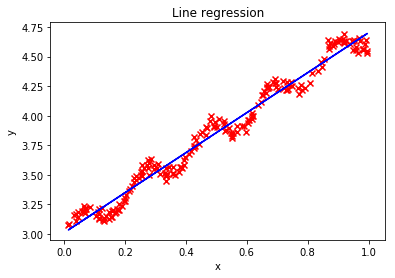

In [9]:
plot_line(xArr,yArr,w.A)

In [10]:
yHat = np.array(xArr).dot(w.A)
#np.corrcoef(yHat.T[0],yArr)
np.corrcoef(yHat.ravel(),yArr)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])